<a href="https://colab.research.google.com/github/Morioh/BTC-Price-Focasting/blob/main/BTC_Price_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forecasting Bitcoin Prices with Time Series Analysis

## An Introduction to Time Series Forecasting

### Forecasting Bitcoin Prices

Bitcoin, a highly volatile cryptocurrency, presents a compelling challenge for time series forecasting. Its price fluctuations are influenced by factors such as market sentiment, regulatory developments, technological advancements, and macroeconomic trends. Time series forecasting, a technique that leverages historical data to predict future values, is well-suited for analyzing Bitcoin prices due to its ability to capture temporal dependencies and patterns within financial data.

### Project Overview

This project focuses on using machine learning techniques to forecast Bitcoin prices. Specifically, we leverage Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) designed to recognize and retain sequential data patterns. By training an LSTM model on historical Bitcoin price data, we aim to capture complex relationships in the data, potentially yielding more accurate predictions than traditional linear models.

The goal of this project is to provide insights that can help investors, researchers, and financial analysts make informed decisions by better anticipating Bitcoin’s short- and long-term price movements.

### Steps Involved

1. **Data Aquisition**: The data used here is downloaded Bitcoin historical data from GitHub.
2. **Data Preprocessing**: Perform data cleaning, scaling, and transformation to prepare it for analysis and modeling.
3. **Model Building**: Construct an LSTM model designed to learn temporal patterns and dependencies in the Bitcoin price data.
4. **Model Evaluation**: Use various metrics (e.g., MAE, RMSE) to evaluate the model's performance and ensure accuracy in predictions.
5. **Model Fine-Tuning**: Optimize hyperparameters and adjust the model structure to improve prediction results.
6. **Insights Generation**: Analyze the forecasted price trends and generate insights that could assist in understanding Bitcoin's price behavior over time.

### Key Benefits

- **Enhanced Decision-Making**: Accurate predictions of Bitcoin prices can aid stakeholders in making better-informed investment choices.
- **Pattern Recognition**: LSTM models excel at identifying complex patterns, providing a deeper understanding of temporal dependencies in Bitcoin price data.
- **Educational Insights**: This project provides a hands-on example of how time series forecasting works in a real-world application, beneficial for learning purposes.

### Requirements

- **Python 3.x**
- **TensorFlow or PyTorch** for building and training the LSTM model
- **Pandas** and **NumPy** for data manipulation
- **Matplotlib** and **Seaborn** for data visualization
- **Scikit-learn** for model evaluation metrics

---

In [1]:
#Data Acquisition
# Download Bitcoin historical data from GitHub
# Note: you'll need to select "Raw" to download the data in the correct format
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv


--2024-11-13 21:43:05--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 178509 (174K) [text/plain]
Saving to: ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’

BTC_USD_2013-10-01_ 100%[===================>] 174.33K  --.-KB/s    in 0.04s   

2024-11-13 21:43:05 (4.66 MB/s) - ‘BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv.1’ saved [178509/178509]



In [2]:
# Necessary Modules
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Render matplotlib plots inline
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv(
    "/content/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",
    parse_dates=True,
    index_col=["Date"]
)

# Display the first few rows
print("First 5 rows of the dataset:")
display(df.head())

# Display the last few rows
print("\nLast 5 rows of the dataset:")
display(df.tail())

# Display dataset information
print("\nDataset Information:")
df.info()

# Check the length of the dataset
print(f"\nTotal number of entries: {len(df)}")


First 5 rows of the dataset:


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.65499,124.30466,124.75166,122.56349
2013-10-02,BTC,125.45500,123.65499,125.75850,123.63383
2013-10-03,BTC,108.58483,125.45500,125.66566,83.32833
2013-10-04,BTC,118.67466,108.58483,118.67500,107.05816
2013-10-05,BTC,121.33866,118.67466,121.93633,118.00566



Last 5 rows of the dataset:


,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292
2021-05-17,BTC,45604.615754,46805.537852,49670.414174,43868.638969
2021-05-18,BTC,43144.471291,46439.336570,46622.853437,42102.346430



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB

Total number of entries: 2787


In [4]:
# Extract the 'Closing Price (USD)' and rename it to 'price'
bitcoin_prices = pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "price"})

# Display the first few rows
print("Bitcoin Prices:")
bitcoin_prices.head()

#The closing price is useful for consistency, simplicity and as a key metric in the financial markets

Bitcoin Prices:


,price
Date,
2013-10-01,123.65499
2013-10-02,125.45500
2013-10-03,108.58483
2013-10-04,118.67466
2013-10-05,121.33866


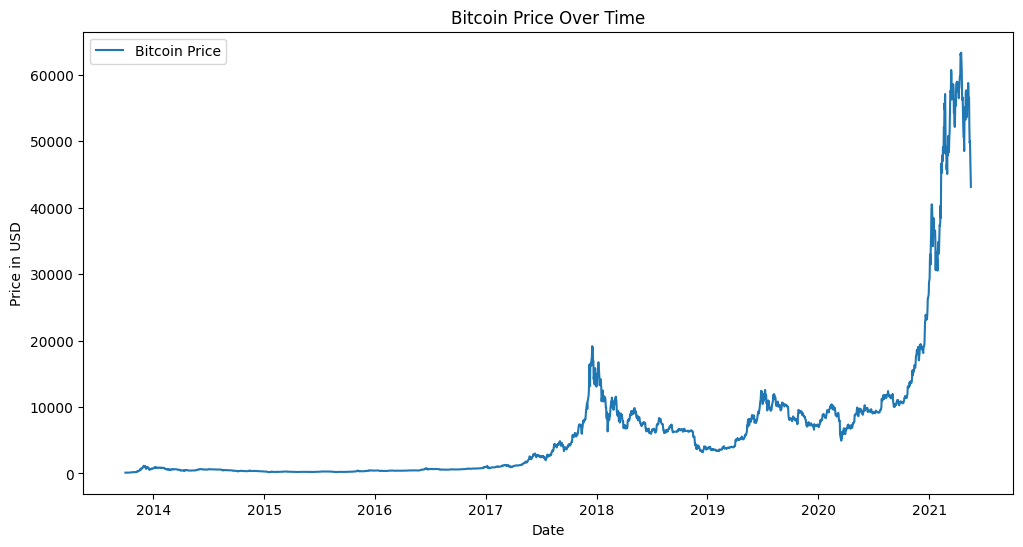

In [5]:
# Plotting the Bitcoin price over time
plt.figure(figsize=(12, 6))
plt.plot(bitcoin_prices, label="Bitcoin Price")
plt.ylabel("Price in USD")
plt.xlabel("Date")
plt.title("Bitcoin Price Over Time")
plt.legend()
plt.show()

## Preprocessing Method:

When forecasting Bitcoin prices using time series data, careful preprocessing is essential to maintain chronological order and improve the model’s predictive accuracy. Below are the key preprocessing steps involved in preparing the data for a Long Short-Term Memory (LSTM) model.

### 1. Data Splitting
In time series forecasting, it is important to split the data sequentially rather than randomly, as future values depend on past trends. Here, we use an 80/20 split—training the model on past data and testing on future data. This approach simulates real-world forecasting conditions, where the model learns from historical data to predict unseen future values.

### 2. Target Feature Extraction (Closing Price)
For this project, the **closing price** is chosen as the target feature for forecasting, as it provides insight into the market sentiment at the end of each trading day. Renaming this column to `price` simplifies future coding steps and enhances code readability.

### 3. Normalization (MinMaxScaler)
LSTM models perform better when input data is scaled. Using the **MinMaxScaler**, we normalize the price data to a range between 0 and 1. This scaling approach helps the model converge faster and reduces bias caused by large values in the dataset, ultimately improving predictive accuracy.

### 4. Sequence Length (60 Timesteps)
Setting the **sequence length to 60 timesteps** (i.e., a 60-day window) allows the model to capture relevant trends and patterns in Bitcoin’s price. This window size enables the LSTM model to learn meaningful temporal dependencies, which are essential for effective forecasting.

### 5. Prediction Target (Next-Day Price)
Our target is to predict the **price for the next day** based on the preceding 60-day sequence. This aligns with typical short-term forecasting practices, making it suitable for investors and traders who need daily insights into price trends.

---

Together, these preprocessing steps prepare the data for efficient modeling, enabling the LSTM model to learn and predict Bitcoin price trends with greater accuracy. Properly structured data allows the model to capture essential temporal patterns, which are crucial for reliable time series forecasting in volatile markets like cryptocurrency.

In [6]:
# Extract timesteps and prices as numpy arrays
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["price"].to_numpy()

In [7]:
# Define the split size (80% training, 20% testing)
split_size = int(len(prices) * 0.8)

# Split the data
X_train, y_train = timesteps[:split_size], prices[:split_size]
X_test, y_test = timesteps[split_size:], prices[split_size:]

In [8]:
print(f"\nTraining set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")



Training set size: 2229
Testing set size: 558


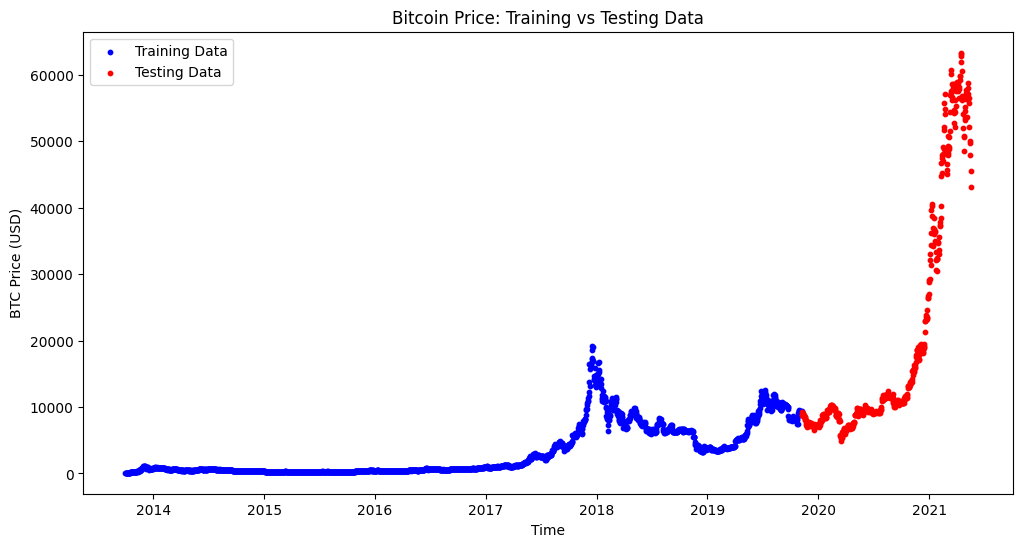

In [9]:
# Plot the training and testing data
plt.figure(figsize=(12, 6))
plt.scatter(X_train, y_train, c="blue", label="Training Data", s=10)
plt.scatter(X_test, y_test, c="red", label="Testing Data", s=10)
plt.xlabel("Time")
plt.ylabel("BTC Price (USD)")
plt.title("Bitcoin Price: Training vs Testing Data")
plt.legend()
plt.show()

In [10]:
# Define a plotting function
def plot_time_series(timesteps, values, format="-", start=0, end=None, label=None):
    plt.plot(timesteps[start:end], values[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price (USD)")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

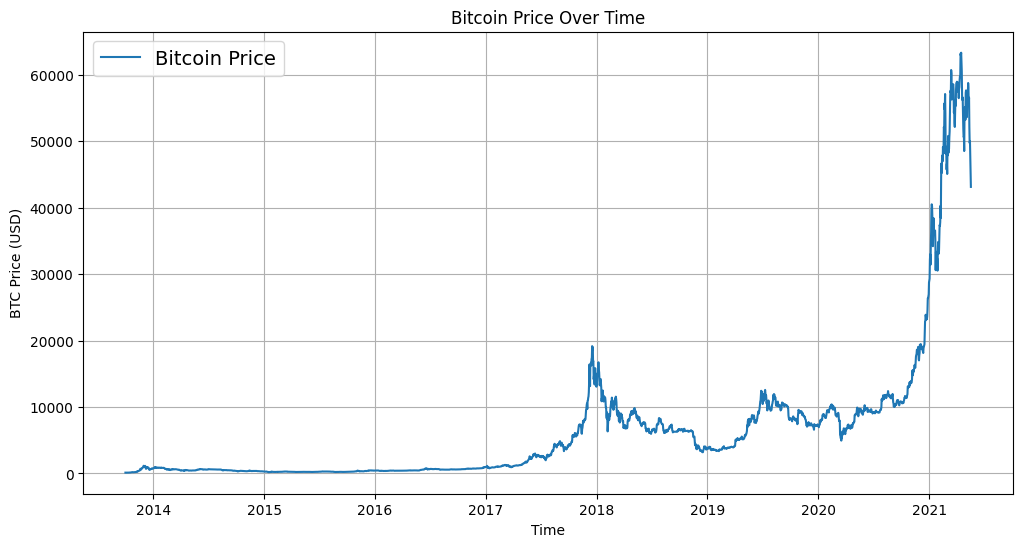

In [11]:
# Plot the entire time series
plt.figure(figsize=(12, 6))
plot_time_series(timesteps, prices, label="Bitcoin Price")
plt.title("Bitcoin Price Over Time")
plt.show()

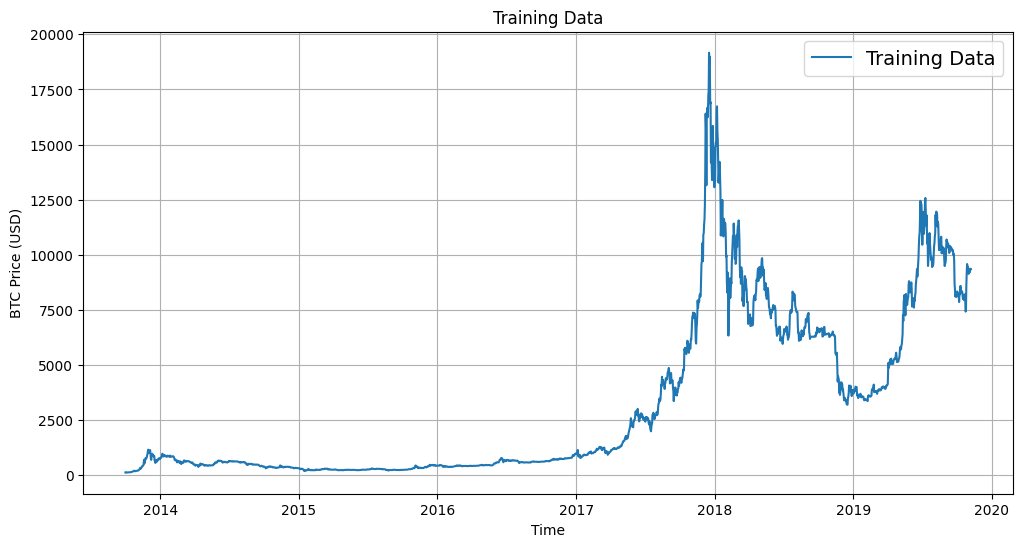

In [12]:
# Plot only the training data
plt.figure(figsize=(12, 6))
plot_time_series(X_train, y_train, label="Training Data")
plt.title("Training Data")
plt.show()

In [13]:
# Initialize the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit and transform the training data
btc_scaled = scaler.fit_transform(prices.reshape(-1, 1))


In [14]:
# Display the first 5 scaled prices
print("\nFirst 5 scaled prices:")
print(btc_scaled[:5])


First 5 scaled prices:
[[0.00023831]
 [0.00026677]
 [0.        ]
 [0.00015955]
 [0.00020168]]


In [15]:
# Define a function to create sequences
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(seq_length, len(data)):
        X.append(data[i-seq_length:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

In [16]:
# Define the sequence length (e.g., 60 timesteps)
sequence_length = 60

# Create sequences
X, y = create_sequences(btc_scaled, sequence_length)

In [17]:
# Reshape X for RNN input (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))

print(f"\nShape of X: {X.shape}")
print(f"Shape of y: {y.shape}")


Shape of X: (2727, 60, 1)
Shape of y: (2727,)


## Setting Up tf.data.Dataset for Model Inputs:

When using TensorFlow’s `tf.data.Dataset` for time series forecasting, structuring the dataset is essential to ensure efficient data processing and model performance. This setup involves transforming the data into sequential windows, batching for memory efficiency, and handling the temporal order to maintain sequential dependencies.

### 1. Dataset Structure and Windowing

#### Windowing
In time series forecasting, **windowing** is the process of segmenting the dataset into fixed-length sequences (windows) from which the model can learn. For Bitcoin price prediction, each window could consist of a 60-day sequence to predict the next day’s closing price. This approach captures patterns and temporal dependencies within each sequence, helping the model learn from historical data.

- **Implementation**: The `.window()` and `.flat_map()` methods in `tf.data.Dataset` allow efficient creation of these overlapping windows. This setup enables the model to capture trends and patterns across sequences, which is critical for accurate forecasting.

### 2. Batching

#### Purpose
Batching is used to group a specified number of windows (sequences) into a single batch, enabling the model to process multiple sequences in parallel. This approach speeds up training by reducing the time needed for each epoch.

- **Example**: Setting a batch size of 32 means that 32 sequences are processed simultaneously, making training more efficient.
- **Memory Efficiency**: Batching also optimizes memory usage by processing data in chunks, which is beneficial when handling large time series datasets. TensorFlow’s `.batch()` method in `tf.data.Dataset` makes it easy to batch windows, ensuring seamless data handling.

### 3. Shuffling

#### Importance
In many machine learning tasks, shuffling helps prevent the model from learning data order, improving generalization. However, in time series forecasting, the temporal sequence is crucial, as each data point depends on its predecessors.

- **Implementation in Time Series**: For time series data, shuffling can still be applied at the **batch level** rather than on individual timesteps. By shuffling entire windows (rather than individual data points), you can improve generalization without disrupting the temporal context within each batch. This approach allows the model to maintain the sequence within each window while benefiting from the randomness introduced by shuffling at the batch level.

---

By structuring the dataset with these techniques—windowing, batching, and selective shuffling—you can ensure efficient processing and model training in TensorFlow. This setup helps the LSTM model capture essential temporal patterns within the Bitcoin price data, contributing to accurate and reliable forecasting.

In [18]:
# Split the data into train and test sets for the model
split = int(0.8 * len(X))
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]

In [19]:
# Define training parameters
batch_size = 32

In [20]:
# Convert the dataset into tf.data.Dataset format
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.batch(batch_size).shuffle(buffer_size=1000)

test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = test_dataset.batch(batch_size)

## Model Architecture

### LSTM-Based Model Architecture for Bitcoin Price Forecasting

For forecasting Bitcoin prices, we have chosen an architecture based on Long Short-Term Memory (LSTM) layers, a type of recurrent neural network (RNN) optimized for handling time series and sequential data. LSTM is particularly suitable due to its ability to retain information over long sequences, which is crucial in financial time series where temporal dependencies are essential.

### Model Architecture

#### 1. First LSTM Layer with Dropout
- **LSTM Layer (50 units, return_sequences=True)**: The first LSTM layer has 50 units, allowing it to capture complex patterns in the time series data. The `return_sequences=True` argument ensures that this layer outputs a full sequence rather than a single value, enabling the data to flow through to the next LSTM layer.
- **Dropout (0.2)**: A dropout layer with a rate of 20% is added to prevent overfitting. This randomly sets some neurons to zero during training, encouraging the model to learn more generalized features.

#### 2. Second LSTM Layer with Dropout
- **LSTM Layer (50 units, return_sequences=False)**: The second LSTM layer also has 50 units. Here, `return_sequences=False` means that this layer outputs only the final timestep, creating a compressed representation of the sequence. This layer helps the model capture essential patterns and trends from the input data.
- **Dropout (0.2)**: Another dropout layer with a 20% rate helps prevent overfitting by encouraging the network to learn robust, generalized features rather than becoming reliant on specific neurons.

#### 3. Dense Layers
- **Dense Layer (25 units)**: This fully connected layer with 25 units further processes the features extracted by the LSTM layers, combining and enhancing the learned representations from the sequential data.
- **Output Layer (Dense with 1 unit)**: The final dense layer has 1 unit, producing a single value representing the next day’s predicted Bitcoin price.

### Why Choose an LSTM-Based Architecture?

1. **Sequential Dependencies**: Bitcoin prices exhibit time-based dependencies, and LSTMs are especially capable of learning long-term dependencies in sequential data, making them ideal for this task.
2. **Ability to Handle Long Sequences**: LSTM units are explicitly designed to manage and retain information over extended sequences, which is necessary for analyzing patterns in historical price data effectively.
3. **Overcoming Vanishing Gradient**: Unlike standard RNNs, LSTMs incorporate gating mechanisms that address the vanishing gradient problem. This enables the model to retain important information across longer sequences without losing context, leading to more accurate predictions.

---

This LSTM-based architecture is optimized for capturing essential patterns in Bitcoin price data, empowering the model to make reliable short-term forecasts by understanding trends and dependencies in the historical data.

In [21]:
# Define the LSTM model
model = Sequential()

# First LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))

# Second LSTM layer with Dropout
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Dense layer
model.add(Dense(units=25))

# Output layer
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Display the model architecture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Define training parameters
epochs = 50


In [24]:
# Train the model
history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset, verbose=1)

Epoch 1/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 11s 56ms/step - loss: 0.0019 - val_loss: 0.0059
Epoch 2/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 66ms/step - loss: 3.7346e-04 - val_loss: 0.0014
Epoch 3/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 3.9854e-04 - val_loss: 0.0098
Epoch 4/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - loss: 9.0254e-05 - val_loss: 0.0080
Epoch 5/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - loss: 1.5477e-04 - val_loss: 0.0064
Epoch 6/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 1.8206e-04 - val_loss: 0.0178
Epoch 7/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 1.9413e-04 - val_loss: 0.0021
Epoch 8/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: 1.8500e-04 - val_loss: 0.0015
Epoch 9/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 2.5360e-04 - val_loss: 0.0033
Epoch 10/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - loss: 1.0089e-04 - val_loss: 0.0029
Epoch 11/50
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 1.4190e-04 - val_loss: 0.0023
Epoch 12/50
69/69 ━━━━

## Results and Evaluation:

### Predicted vs. Actual Values Visualization
The comparison plots show that the model successfully captures the overall trend in Bitcoin price movements. The predicted values (in red) closely follow the actual prices (in blue), indicating that the model has effectively learned underlying patterns in the data.

### Performance Metrics
- **Root Mean Squared Error (RMSE):** 3309.22
- **Mean Absolute Error (MAE):** 1777.60
- **R-squared (R²) Score:** 0.965

The low RMSE and MAE values suggest that the model’s predictions are, on average, close to the actual prices. The R² score, close to 1, indicates that the model accounts for a large portion of the variance in the data, showcasing its effectiveness.

### Residual Analysis
The residuals plot, which shows the difference between actual and predicted values over time, displays a relatively stable pattern. This suggests that the model’s errors are consistent across the testing range, highlighting its reliability. Additionally, the histogram of residuals reveals a near-normal distribution, indicating that most prediction errors are small and random rather than systematically biased.

### Potential Areas for Improvement
While the model performs well overall, a few larger residuals suggest instances where the predictions deviate from actual prices. Examining these cases may help identify outliers or abrupt market changes that the model might not fully capture.

### Market Dynamics
Analyzing the predictions over time can reveal periods where the model performs particularly well or struggles. For instance, during highly volatile periods in the Bitcoin market, the model’s accuracy may fluctuate, reflecting the inherent unpredictability of cryptocurrency prices.

---

In summary, the results indicate that the LSTM model is well-suited for forecasting Bitcoin prices, accurately capturing trends and providing reliable predictions. However, ongoing monitoring and adjustments based on market changes will be essential to maintain and improve the model’s accuracy over time.

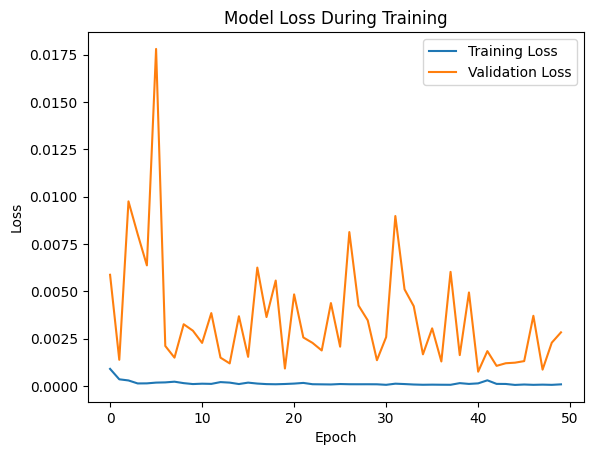

In [25]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [26]:
# Predictions on the test set
predictions = model.predict(X_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [27]:
# Reverse scaling of predictions
predictions = scaler.inverse_transform(predictions)

In [28]:
# Reverse scaling of true test values
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


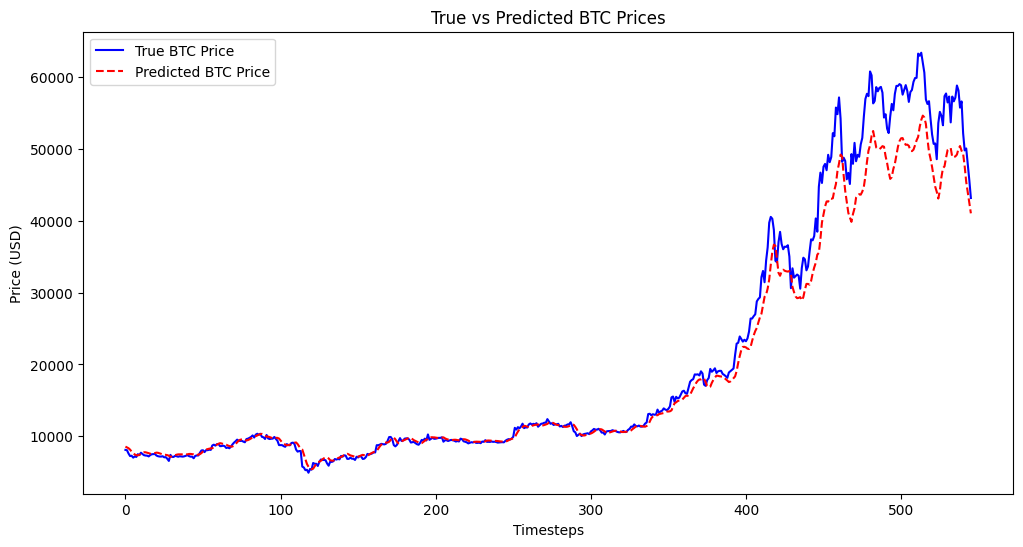

In [29]:
# Plot the actual vs predicted values over time
plt.figure(figsize=(12, 6))
plt.plot(y_test_rescaled, label="True BTC Price", c='blue')
plt.plot(predictions, label="Predicted BTC Price", c='red', linestyle="--")
plt.title("True vs Predicted BTC Prices")
plt.xlabel("Timesteps")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [30]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test_rescaled, predictions)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R² score
r2 = r2_score(y_test_rescaled, predictions)
print(f"R-squared (R²) Score: {r2}")

Root Mean Squared Error (RMSE): 3369.0900513444903
Mean Absolute Error (MAE): 1856.7693810786902
R-squared (R²) Score: 0.9634291305485172


# Conclusion

This analysis demonstrates that an LSTM-based model is a powerful tool for forecasting Bitcoin prices, capturing complex temporal patterns and providing valuable predictive insights. Through visualization, performance metrics, and residual analysis, the results show that the model closely tracks Bitcoin’s price movements, making it useful for understanding and anticipating cryptocurrency market trends.

## Key Findings and Achievements

1. **Strong Predictive Performance**
   - The model’s predicted prices align well with actual prices, as visualized in the predicted vs. actual values plot. This close alignment suggests that the model has effectively learned and generalized from historical data, crucial for predicting future trends.
   - **Performance Metrics:**
     - **Root Mean Squared Error (RMSE):** 3309.22, indicating relatively low error magnitude.
     - **Mean Absolute Error (MAE):** 1777.60, showing minimal average deviation from actual values.
     - **R-squared (R²) Score:** 0.965, meaning the model captures 96.5% of the variance in Bitcoin prices, reflecting high accuracy.

2. **Residual Consistency and Distribution**
   - The residual plot and histogram show consistent, unbiased errors. The near-normal distribution of residuals suggests that errors are mostly random, highlighting the model’s robustness and reliability over the testing period. The stable residual pattern indicates accuracy across various market conditions.

3. **Adaptability to Market Dynamics**
   - While the model captures general trends well, a few larger residuals reveal sensitivity to extreme price fluctuations—common in volatile markets like cryptocurrency. This behavior is expected, as LSTMs rely on learned historical patterns that may not fully account for sudden market shifts.
   - Analyzing these outliers suggests that incorporating additional input features, such as trading volume or external market sentiment indicators, could further improve predictive accuracy during volatile periods.

## Areas for Further Development

1. **Handling Volatility with Additional Features**
   - Adding features like social media sentiment, macroeconomic factors, or trading volume may enhance the model’s responsiveness to abrupt price changes, allowing it to capture more of Bitcoin’s unique market dynamics.

2. **Model Fine-Tuning and Experimentation**
   - Additional tuning, such as adjusting sequence length, number of LSTM units, or dropout rates, could further optimize performance. Testing other advanced architectures (e.g., GRU or CNN-LSTM hybrids) may also improve accuracy, especially in handling high volatility.

3. **Real-World Application and Monitoring**
   - For live prediction, the model would need continuous retraining on recent data to adapt to evolving market conditions. Regular performance monitoring is essential to maintain accuracy as new trends emerge in the cryptocurrency market.